# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [36]:
import pandas as pd
abalone = pd.read_csv('./data/abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [37]:
abalone.nunique()

sex              3
length         134
diameter       111
height          51
whole_wt      2429
shucked_wt    1515
viscera_wt     880
shell_wt       926
rings           28
age             28
dtype: int64

Age in years. In https://searanchabalonebay.com/diving-fishing/abalone-season-17/ they said that abalone can harvest in 12 years or more. 

In [38]:
abalone.min()

sex                F
length         0.075
diameter       0.055
height           0.0
whole_wt       0.002
shucked_wt     0.001
viscera_wt    0.0005
shell_wt      0.0015
rings              1
age              2.5
dtype: object

How does weight change with age for each of the three sex categories?

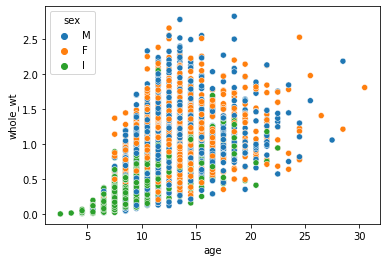

In [39]:
import seaborn as sns
sns.scatterplot(
    x="age", 
    y="whole_wt",
    data=abalone,
    hue='sex');

In [40]:
import numpy as np
category=['Young','Collection', 'Harvest']
abalone['age']=pd.cut(abalone['rings'], [2.5,7,12,28], labels=category)

In [41]:
abalone.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Harvest
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Collection
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Collection
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Young


In [42]:
abalone.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


2.5-7 years: Young

7-12 years: Collection

more than 12 years: Harvest

Text(0.5, 1.0, 'Count of Abalone sex')

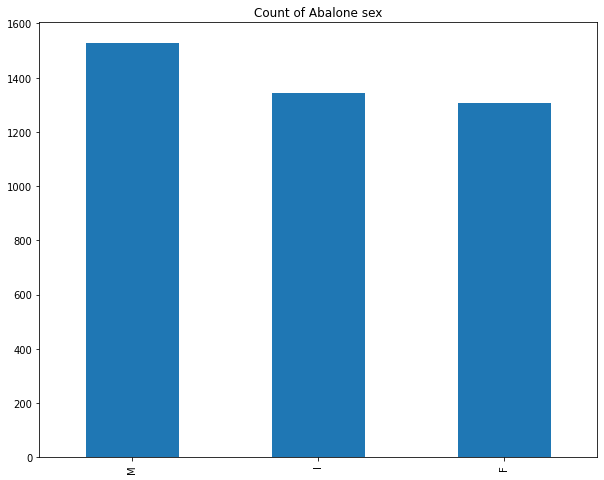

In [43]:
import matplotlib.pyplot as plt
sex = abalone['sex'].value_counts()
sex.plot(kind='bar',figsize=(10,8))
plt.title('Count of Abalone sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

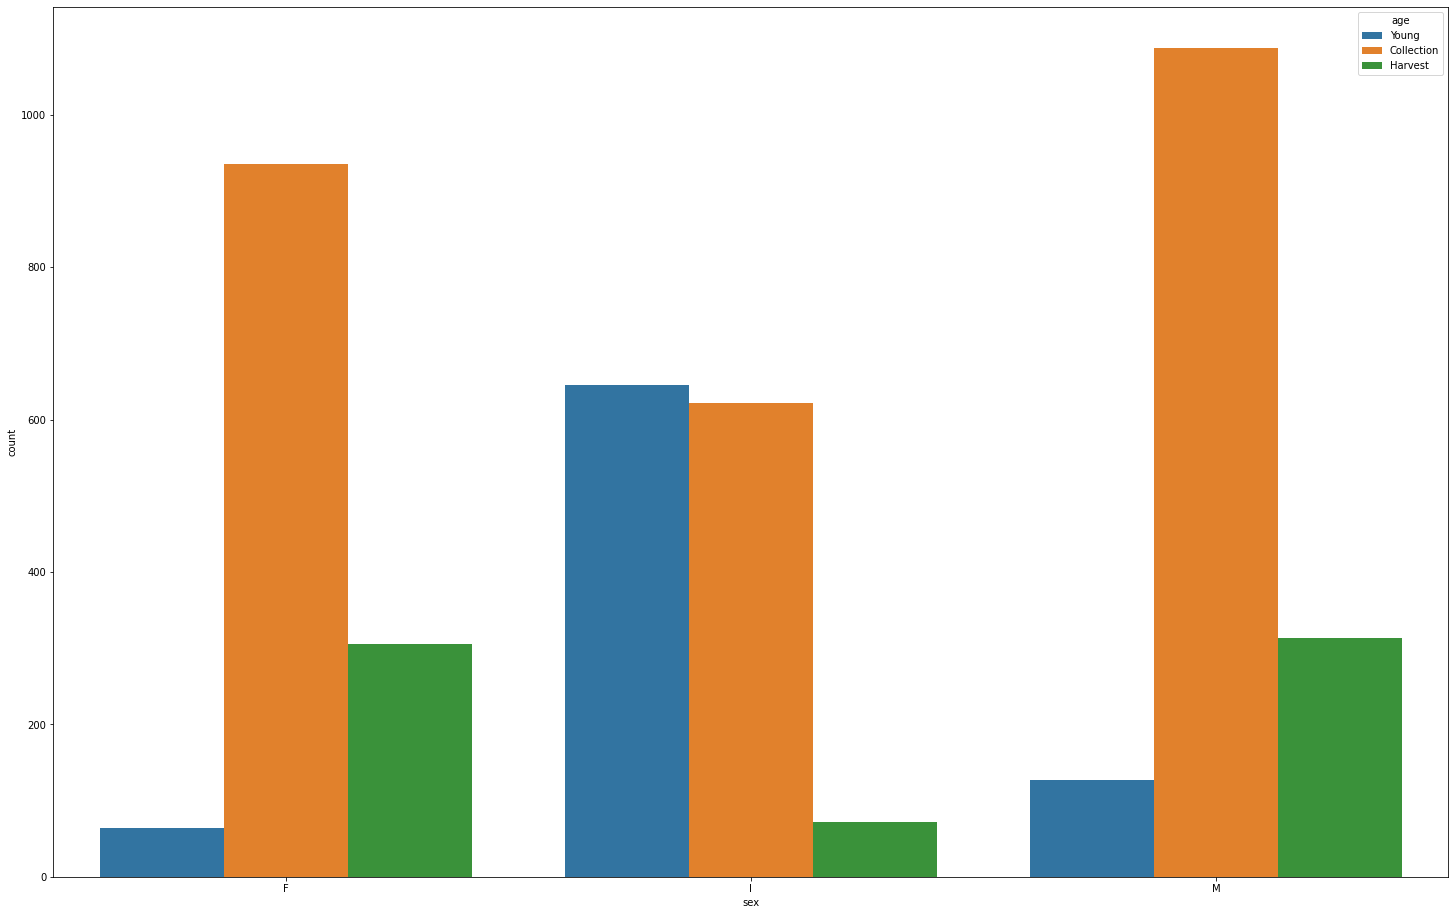

In [44]:
sex=abalone.sex.value_counts().index
plt.figure(figsize=(25,16))
import seaborn as sns
sns.countplot(x='sex', data=abalone, hue='age', order=sorted(abalone.sex.unique()))

many abalone ready for legal collection 

In [45]:
abalone=abalone.dropna()
age = {'Young':1, 'Collection':2, 'Harvest':3}
abalone.age=abalone.age.apply(lambda y:age[y])

In [46]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4174 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   sex         4174 non-null   object  
 1   length      4174 non-null   float64 
 2   diameter    4174 non-null   float64 
 3   height      4174 non-null   float64 
 4   whole_wt    4174 non-null   float64 
 5   shucked_wt  4174 non-null   float64 
 6   viscera_wt  4174 non-null   float64 
 7   shell_wt    4174 non-null   float64 
 8   rings       4174 non-null   int64   
 9   age         4174 non-null   category
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 330.3+ KB


In [47]:
abalone=abalone.dropna()
sex = {'M':1, 'F':2, 'I':3}
abalone.sex=abalone.sex.apply(lambda x:sex[x])

In [48]:
abalone = abalone.apply(pd.to_numeric)

In [49]:
abalone.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,3
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


Investigate which variables are better predictors of age for abalones.

<AxesSubplot:>

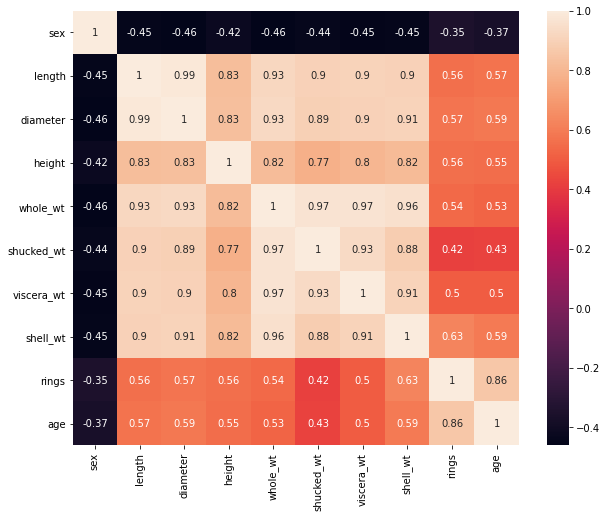

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(abalone.corr(),annot=True)

based on correlation matrix, high correlation matrix for predict age are length, diameter, height, whole_wt, shucked_wt, shell_wt, and rings

In [51]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4174 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4174 non-null   int64  
 1   length      4174 non-null   float64
 2   diameter    4174 non-null   float64
 3   height      4174 non-null   float64
 4   whole_wt    4174 non-null   float64
 5   shucked_wt  4174 non-null   float64
 6   viscera_wt  4174 non-null   float64
 7   shell_wt    4174 non-null   float64
 8   rings       4174 non-null   int64  
 9   age         4174 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 358.7 KB


2. Can you estimate an abalone's age using its physical characteristics?
>> Yes, we can predict abalone's age with multi-class classification model such as Random Forest, Decision tree, and KNeural Neighbors

In [52]:
feature = abalone[['length', 'diameter', 'height', 'whole_wt', 'viscera_wt', 'shell_wt', 'rings']]

target = abalone['age']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,test_size=0.25,random_state=10)

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res,y_train_res = sm.fit_resample(X_train, y_train)

#decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(class_weight='balanced', max_depth=3)
model_dt.fit(X_train_res,y_train_res)
y_pred = model_dt.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Recall:',recall_score(y_test, y_pred, average='macro'))
print('F1-score:', f1_score(y_test, y_pred, average='macro'))
print('Matthew correlation:', matthews_corrcoef(y_test, y_pred))


Accuracy: 1.0
Recall: 1.0
F1-score: 1.0
Matthew correlation: 1.0


In [55]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=1, n_estimators=10)
model_rf.fit(X_train_res,y_train_res)
y_pred = model_rf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Recall:',recall_score(y_test, y_pred, average='macro'))
print('F1-score:', f1_score(y_test, y_pred, average='macro'))
print('Matthew correlation:', matthews_corrcoef(y_test, y_pred))

Accuracy: 0.9990421455938697
Recall: 0.9979674796747968
F1-score: 0.9987263731726604
Matthew correlation: 0.9982110202247428


In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test)

print('Accuracy:',r2_score(y_test,y_pred))


Accuracy: 0.9291191987972017


In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, solver = 'liblinear')
logreg_model = logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:',recall_score(y_test, y_pred, average='macro'))
print('F1-score:', f1_score(y_test, y_pred, average='macro'))
print('Matthew correlation:', matthews_corrcoef(y_test, y_pred))

Precision: 0.960727969348659
Recall: 0.9455162498189867
F1-score: 0.9559099406212809
Matthew correlation: 0.9267647375318864


## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!